# Examining sign of coefficients in region 0 for both methods

Trying to understand the switches in sign we see in the radiation modes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [3]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=1e-6, symmetric=True)


In [9]:
def coeffs_paper(Z, sign='1', field_type='TE', entry=0):
    M = A.transmission_matrix_Z(Z)
    detM = A.transmission_determinant_Z(Z, field_type=field_type)
    frac = (-M[..., 1, 0] * detM) / M[..., 0, 1]
    b = int(sign) * np.sqrt(frac, dtype=complex)
    r1 = -M[..., 1, 0] / M[..., 1, 1]
    t2 = 1 / M[..., 1, 1]
    C = 1 / np.sqrt(r1 + b * t2, dtype=complex)
    if entry ==0:
        return C
    elif entry == 1:
        return C.conjugate()
    else:
        raise TypeError('Entry must be 0 or 1')

def coeffs_ours(Z, sign='1', field_type='TE', entry=0):
    M = A.transmission_matrix_Z(Z)
    detM = A.transmission_determinant_Z(Z, field_type=field_type)
    frac = (-M[..., 1, 0] * detM) / M[..., 0, 1]
    b = int(sign) * np.sqrt(frac, dtype=complex)
    
    factor = M[..., 0, 0].conj() + b - M[..., 0, 1].conj()
    C0 = (b.conj() - M[..., 0, 1]) * factor
    C1 = M[..., 0, 0] * factor
    # factor2 = np.sqrt(4 *C0 * C1,
    #                   dtype=complex)
    factor2 = np.sqrt((1+np.abs(b)**2) * (np.abs(C0)**2 + np.abs(C1)**2))

    if entry ==0:
        return C0 * np.sqrt(2/np.pi) * 1 / factor2
    elif entry == 1:
        return C1 * np.sqrt(2/np.pi) * 1 / factor2
    else:
        raise TypeError('Entry must be 0 or 1')


In [10]:
args0 = ('1', 'TE', 0)
args1 = ('1', 'TE', 1)

In [28]:
xs = np.linspace(0.0001, 3*np.pi, 1000)
ys_paper = coeffs_paper(xs)
ys_ours = coeffs_ours(xs)

## Paper method

### 1D

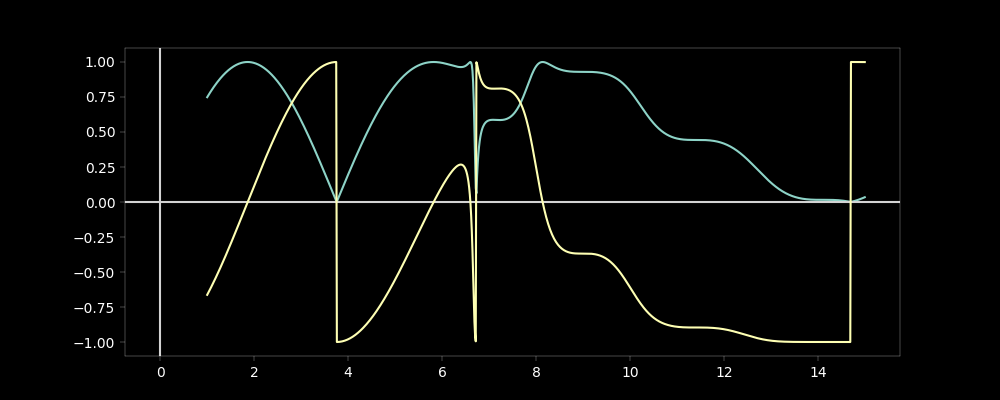

In [39]:
plotlogf_real(coeffs_paper, 1, 15, abs_off=True, log_off=True, part='real');
A.add_1d_plot(coeffs_paper, xs=np.linspace(1, 15, 1000), part='imag')

### Contour

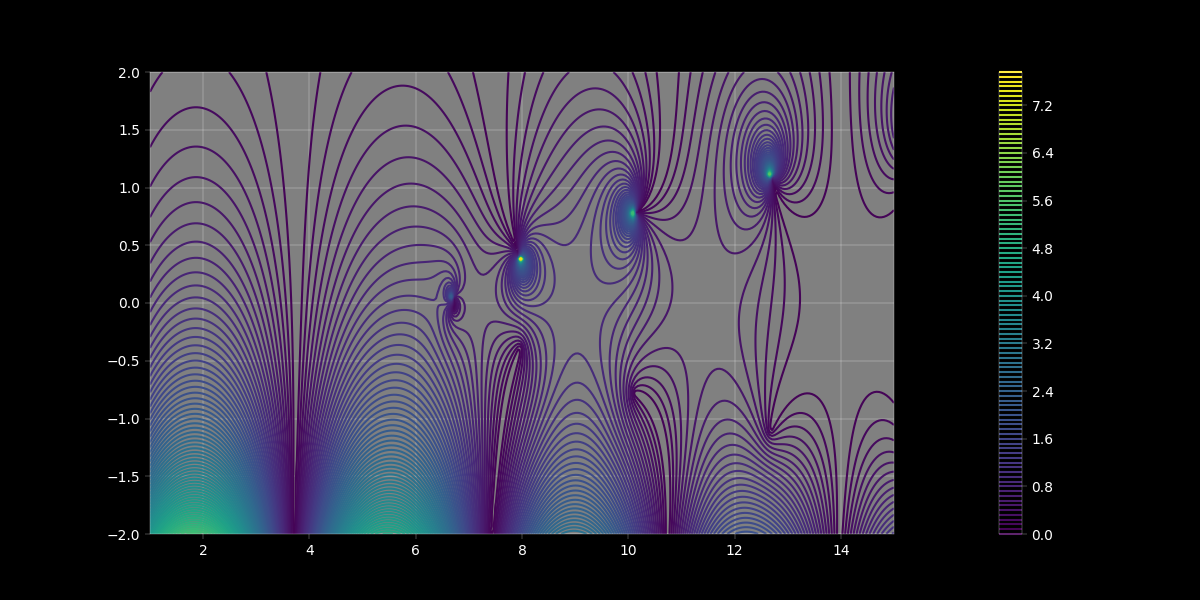

In [40]:
plotlogf(coeffs_paper, 1, 15, -2,2, iref=300, rref=300, levels=100, part='real', abs_off=True)

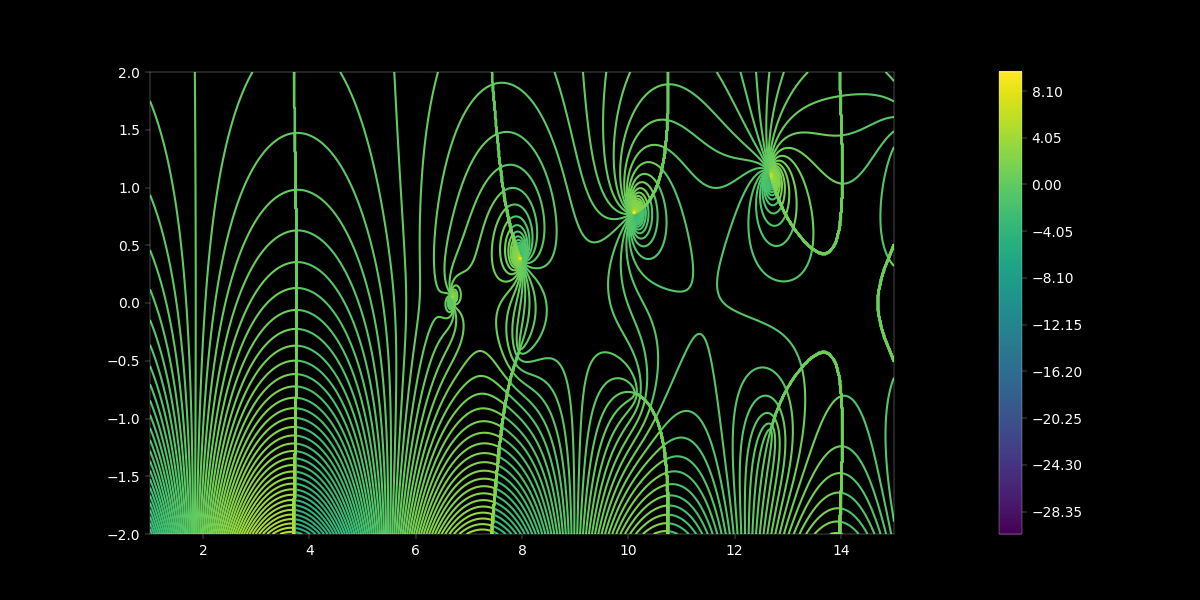

In [49]:
plotlogf(coeffs_paper, 1, 15, -2,2, iref=500, rref=1000, levels=300, part='imag', abs_off=True, 
         facecolor='k', grid=False)

### 3d

### Real

In [42]:
plt.rcParams['grid.linewidth'] = .2
plt.rcParams['axes.linewidth']=.2
plt.rcParams['xtick.major.width']=.2
plt.rcParams['ytick.major.width']=.2


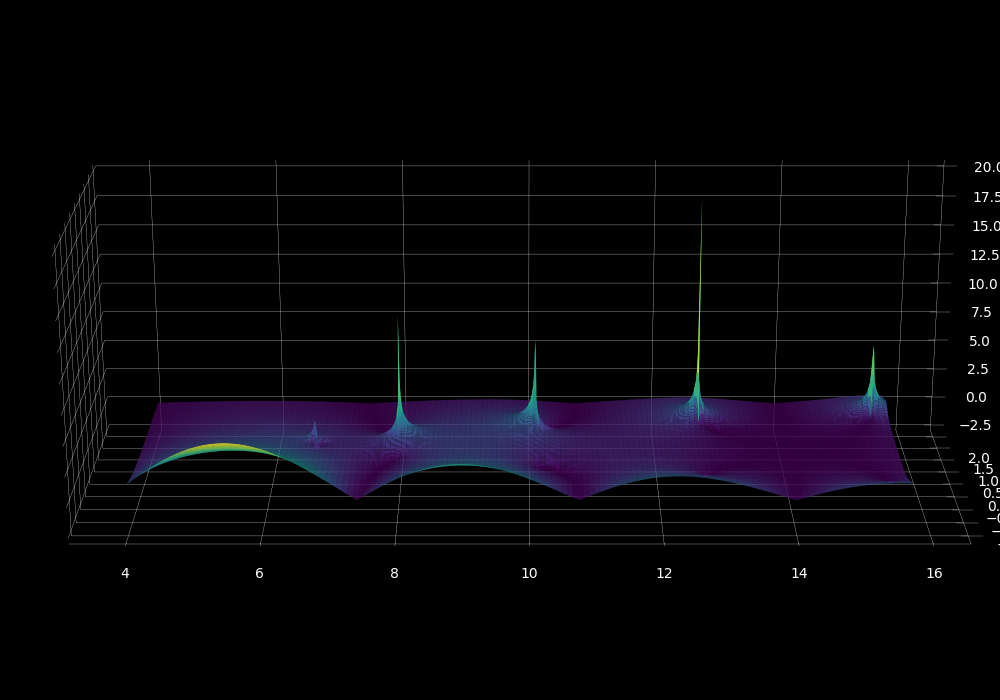

In [43]:
plotlogf(coeffs_paper, 4, 5*np.pi, -2,2, iref=1000, rref=1000, levels=100, part='real', abs_off=True,
        three_D=True, axis_off=False, colorbar=False, elev=20, zoom=1.75, cstride=7, rstride=7, figsize=(10,7),
        z_lims=[-2.5,20])
ax = plt.gca()
ax.xaxis.set_pane_color('k')
ax.yaxis.set_pane_color('k')
ax.zaxis.set_pane_color('k')

### Imag

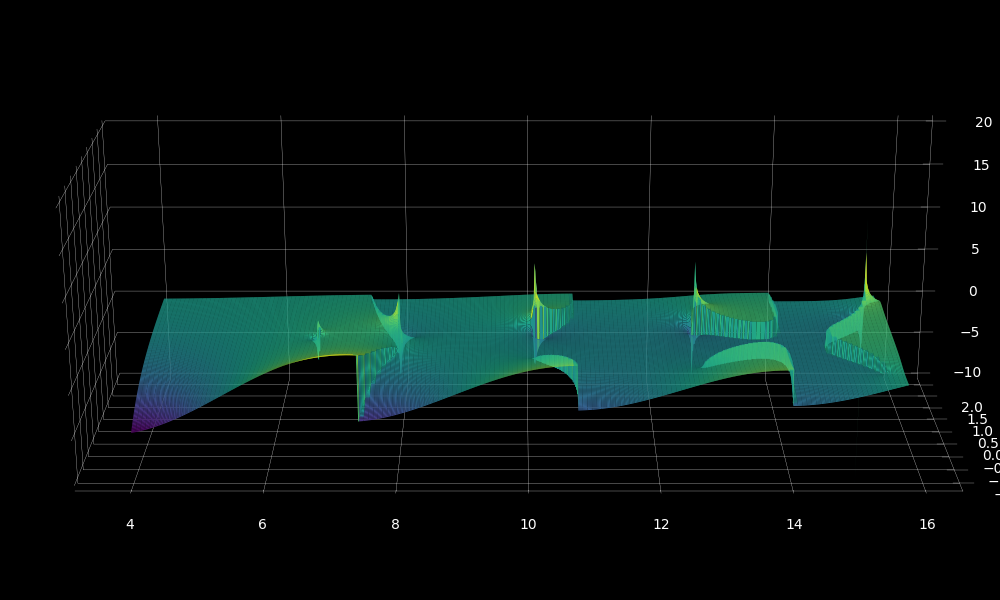

In [44]:
plotlogf(coeffs_paper, 4, 5*np.pi, -2,2, iref=1000, rref=1000, levels=100, part='imag', abs_off=True,
        three_D=True, axis_off=False, colorbar=False, elev=20, zoom=2, cstride=6, rstride=6, figsize=(10,6),
        z_lims=[-10,20])
ax = plt.gca()
ax.xaxis.set_pane_color('k')
ax.yaxis.set_pane_color('k')
ax.zaxis.set_pane_color('k')

## Ours

### 1d

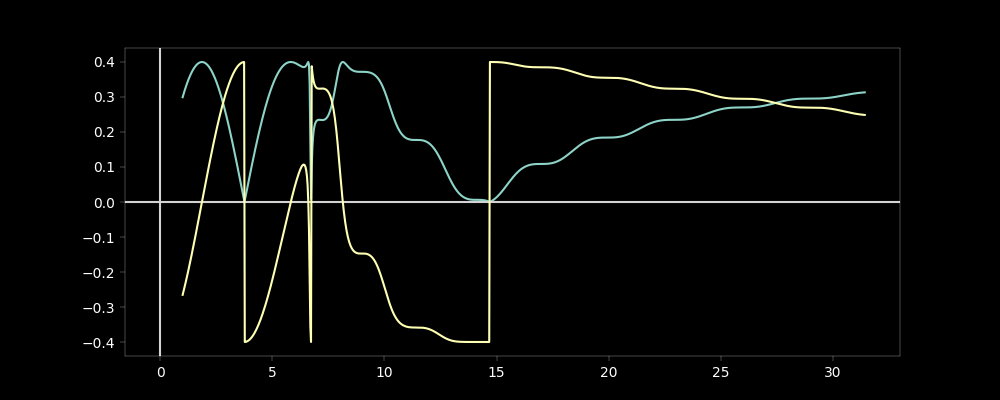

In [45]:
plotlogf_real(coeffs_ours, 1, 10*np.pi, abs_off=True, log_off=True, part='real');
A.add_1d_plot(coeffs_ours, xs=np.linspace(1, 10*np.pi, 1000), part='imag')

### Contour

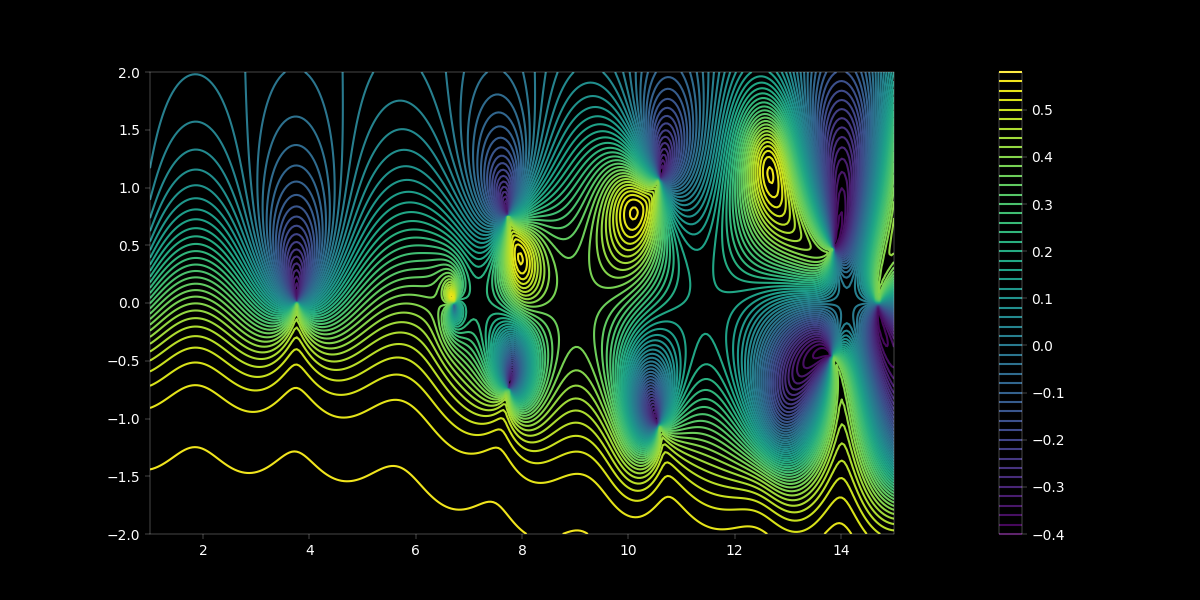

In [50]:
plotlogf(coeffs_ours, 1, 15, -2,2, iref=300, rref=300, levels=50, part='real', abs_off=True,
        facecolor='k', grid=False)

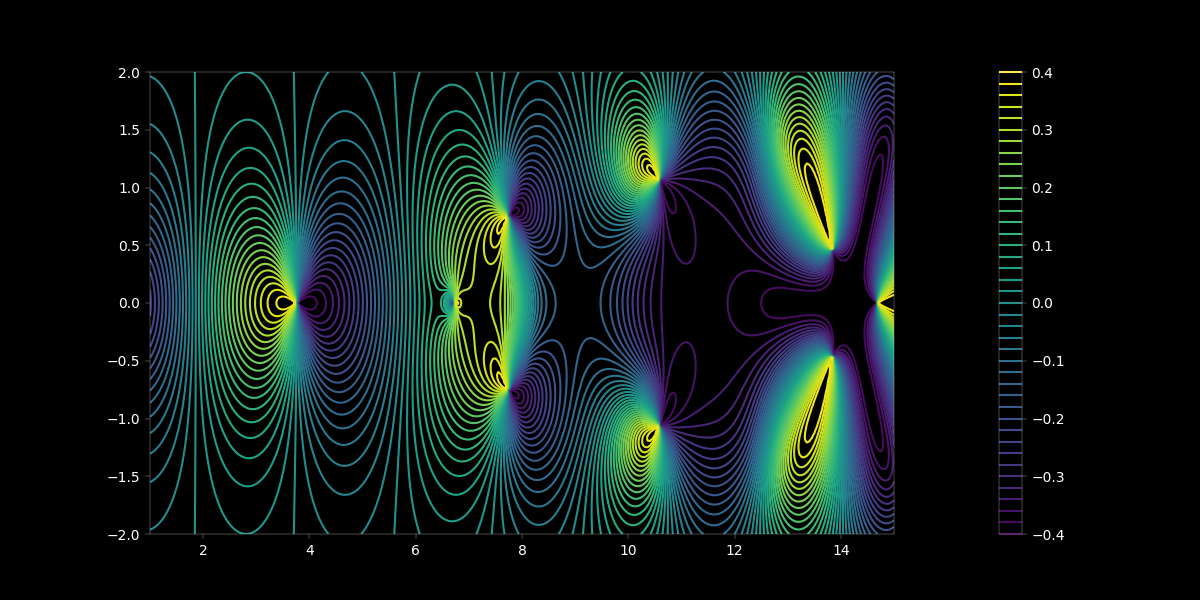

In [53]:
plotlogf(coeffs_ours, 1, 15, -2,2, iref=300, rref=300, levels=50, part='imag', abs_off=True, 
         facecolor='k', grid=False)

### 3d

### Real

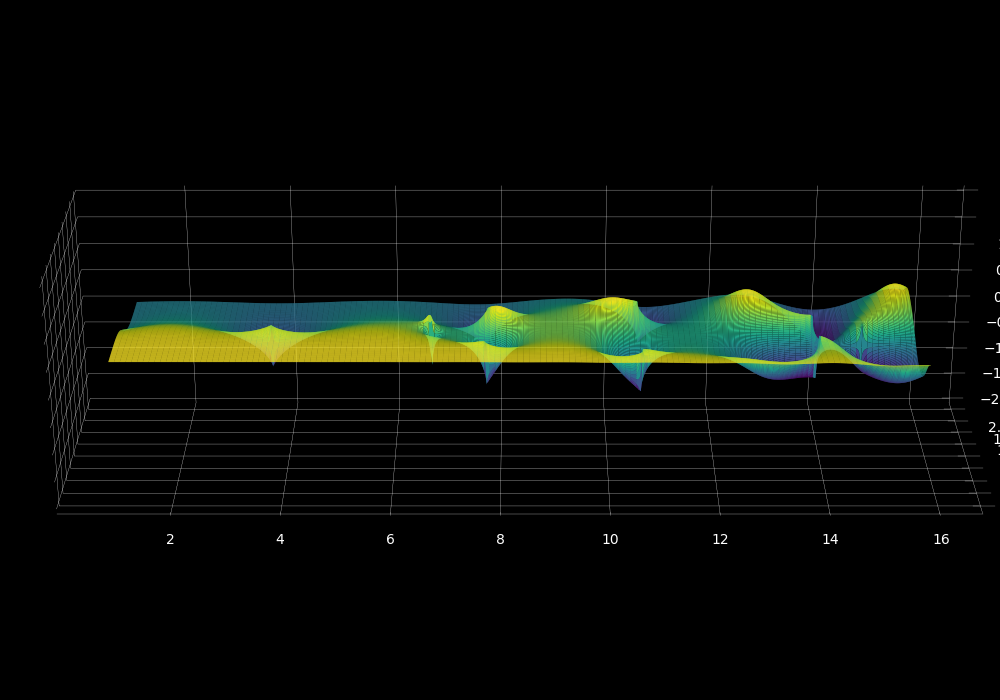

In [55]:
plotlogf(coeffs_ours, 1, 5*np.pi, -2,2, iref=1000, rref=1000, part='real', abs_off=True,
        three_D=True, axis_off=False, colorbar=False, elev=25, zoom=1.75, cstride=7, rstride=7, figsize=(10,7),
        z_lims=[-2, 2])

ax = plt.gca()
ax.xaxis.set_pane_color('k')
ax.yaxis.set_pane_color('k')
ax.zaxis.set_pane_color('k')

### Imag

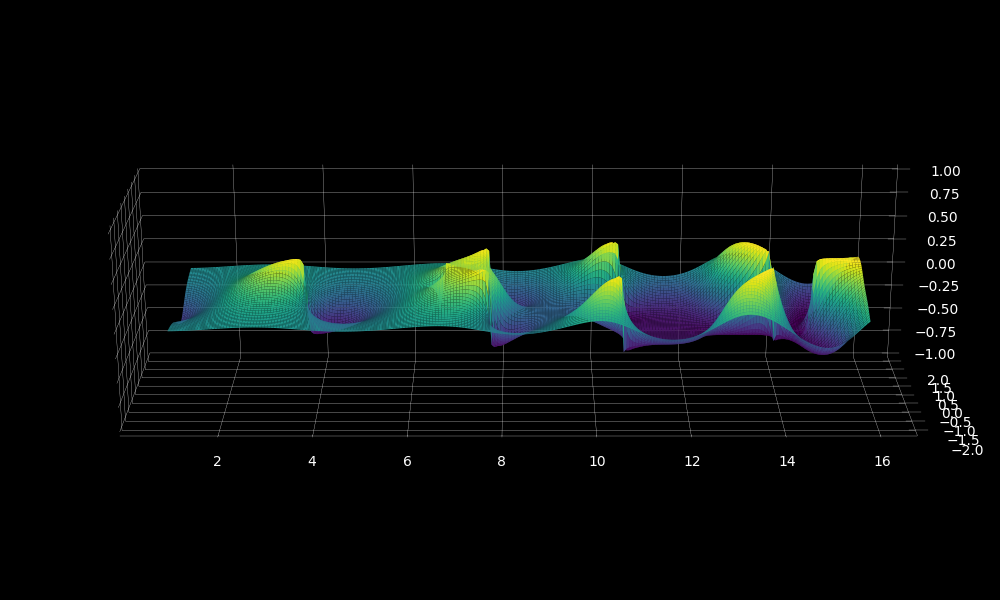

In [69]:

plotlogf(coeffs_ours, 1, 5*np.pi, -2,2, iref=60, rref=240, part='imag', abs_off=True,
        three_D=True, axis_off=False, colorbar=False, elev=20, zoom=1.75, cstride=1, rstride=1, figsize=(10,6),
        z_lims=[-1, 1]);

ax = plt.gca()
ax.xaxis.set_pane_color('k')
ax.yaxis.set_pane_color('k')
ax.zaxis.set_pane_color('k')
